<p style="font-family: 'Comic Sans MS', serif; font-size: 40px; font-weight: bold; text-align: center; color: #D4EBF8; background-color: #212529; padding: 20px; border: 2px solid #D4EBF8; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Stores 🏬| Time Series</p>

<div align="center" style="background-color: #091057; padding: 20px; border-radius: 10px;">
  <h1 style="color: #A0D683;">Loading Libraries</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import IFrame
from plotly.offline import plot
from plotly.subplots import make_subplots


from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<div align="center" style="background-color: #77CDFF; padding: 20px; border-radius: 10px;">
  <h1 style="color: #EC8305;">Data Loading</h1>
</div>

In [2]:
data = pd.read_csv("/kaggle/input/stores-sales-dataset/df_cleaned.csv")

In [3]:
data.shape

(374247, 20)

In [4]:
df2 = data.copy()
df2['Date'] = pd.to_datetime(df2['Date'])

<div align="center" style="background-color: #72BF78; padding: 20px; border-radius: 10px;">
  <h1 style="color: #433878;">Exploratory Data Analysis</h1>

</div>

## Average Monthly Sales

In [5]:
df2['YearMonth'] = df2['Date'].dt.to_period('M')
monthly_sales = df2.groupby('YearMonth')['Weekly_Sales'].sum()

fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=monthly_sales.index.astype(str),  
    y=monthly_sales.values,
    mode='lines',
    name='Monthly Sales'
))

fig1.update_layout(
    title='Monthly Weekly_Sales Trend',
    xaxis_title='Year-Month',
    yaxis_title='Total Weekly Sales',
    xaxis=dict(tickformat="%Y-%m"),
    template='plotly_white'
    # height=600,
    # width=1000
)
plot(fig1, filename="monthlysales.html", auto_open=False)

IFrame("monthlysales.html", width=800, height=600)
# fig1.show()


1. **Seasonal Fluctuations**: The total weekly sales exhibit clear periodic fluctuations, indicating possible seasonal trends in consumer behavior.

2. **Peaks and Troughs**: There are noticeable peaks around mid-year and year-end periods, possibly driven by holidays or specific seasonal sales events.

3. **Declining Stability**: Sales experience significant drops at certain intervals (e.g., around 2011 and early 2012), suggesting potential external disruptions or changes in market conditions.

4. **Overall Trend**: While the pattern is volatile, the overall sales level appears relatively stable, fluctuating around a similar range over the years.

## Occurrences of each store

In [6]:
# Count occurrences of each store and reset index
store_counts = df2['Store'].value_counts().reset_index()
store_counts.columns = ['Store', 'Count']

fig2 = px.bar(
    store_counts,
    x='Store', 
    y='Count',
    labels={'Store': 'Store', 'Count': 'Count'},
    title='Distribution of Stores'
)

fig2.update_layout(
    xaxis_title='Store',
    yaxis_title='Count',
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    template='plotly_white'
    # height=600,
    # width=1000
)

plot(fig2, filename="Count_occurrences_of_each_store.html", auto_open=False)

IFrame("Count_occurrences_of_each_store.html", width=800, height=600)
# fig2.show()


1. **Uniform Store Distribution**: The majority of stores have a relatively consistent count close to 8,000–10,000.

2. **Exceptions**: A few stores deviate significantly from the norm, with counts as low as around 2,000, indicating outliers or possible data anomalies.

3. **General Stability**: Despite some deviations, the overall distribution across most stores appears stable and balanced. 

4. **Potential for Analysis**: Investigating the stores with significantly lower counts might reveal factors contributing to their deviation, such as operational challenges or regional demand differences.

## Occurrences of each department

In [7]:
# Count occurrences of each department and reset index
dept_counts = df2['Dept'].value_counts().reset_index()
dept_counts.columns = ['Dept', 'Count']

fig3 = px.bar(
    dept_counts,
    x='Dept', 
    y='Count',
    labels={'Dept': 'Department', 'Count': 'Count'},
    title='Distribution of Departments'
)

fig3.update_layout(
    xaxis_title='Department',
    yaxis_title='Count',
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    template='plotly_white'
)

plot(fig3, filename="Count_occurrences_of_each_department.html", auto_open=False)
# Display the HTML file in the notebook
IFrame("Count_occurrences_of_each_department.html", width=800, height=600)


1. **Varied Department Distribution**: The count of departments shows significant variation, with some departments having consistently high counts (around 5,000–6,000) while others show much lower values.

2. **Gaps in Data**: There are departments with little to no representation, suggesting either inactive or niche departments with limited coverage.

3. **Top-Performing Departments**: Certain departments dominate in terms of count, indicating their higher relevance or popularity compared to others.

4. **Potential for Streamlining**: The wide variation in department counts suggests opportunities for reallocation or optimization, particularly for departments with low counts.

## Occurrences of each type

In [8]:
# Count occurrences of each type and reset index
type_counts = df2['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

fig4 = px.bar(
    type_counts,
    x='Type', 
    y='Count',
    labels={'Type': 'Store Type', 'Count': 'Count'},
    title='Distribution of Store Type'
)

fig4.update_layout(
    xaxis_title='Type',
    yaxis_title='Count',
    template='plotly_white',
    height=600,
    width=800
)

plot(fig4, filename="Count_occurrences_of_each_type.html", auto_open=False)

IFrame("Count_occurrences_of_each_type.html", width=800, height=600)

1. **Store Type A Dominance**: Type A stores represent the majority, indicating they are the primary format and core focus for the business.

2. **Secondary Role of Type B**: Type B stores have a considerable count but are less prominent than Type A, suggesting they serve as a complementary format.

3. **Niche Presence of Type C**: Type C stores have the smallest representation, highlighting their likely specialized or limited role in the overall strategy.

In [9]:
df2.columns

Index(['Date', 'Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Week', 'max', 'min', 'mean', 'median', 'std', 'Total_MarkDown',
       'YearMonth'],
      dtype='object')

The dataset has the following columns

1. **Date**: The specific date of the recorded data.
2. **Store**: Identifier for the store.
3. **Dept**: Identifier for the department within the store.
4. **Weekly_Sales**: Weekly sales revenue for a specific department in a store.
5. **Type**: Store type (e.g., A, B, or C as seen earlier).
6. **Size**: Size of the store, likely in square feet or a similar metric.
7. **Temperature**: Average temperature during the week, possibly affecting sales trends.
8. **Fuel_Price**: Price of fuel, which could influence consumer spending patterns.
9. **CPI (Consumer Price Index)**: Economic indicator related to inflation and purchasing power.
10. **Unemployment**: Unemployment rate, an economic indicator.
11. **IsHoliday**: Boolean (True/False) indicating if the week includes a holiday.
12. **Year**: Year of the data entry.
13. **Month**: Month of the data entry.
14. **Week**: Week number of the data entry.
15. **max**: Maximum value of weekly sales or other metrics (context-specific).
16. **min**: Minimum value of weekly sales or other metrics (context-specific).
17. **mean**: Average value of weekly sales or other metrics.
18. **median**: Median value of weekly sales or other metrics.
19. **std**: Standard deviation, indicating variability in weekly sales or other metrics.
20. **Total_MarkDown**: Total markdown value, possibly indicating discounts or price reductions.
21. **YearMonth**: Combined year and month for easier aggregation and analysis.

## Correlation between Numerical features

In [10]:
# Select numeric columns and calculate correlation matrix
num_col = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 
           'Unemployment', 'Total_MarkDown', 'max', 'min', 'mean', 'median', 'std']
corr_mat = df2[num_col].corr()

fig5 = ff.create_annotated_heatmap(
    z=corr_mat.values,
    x=corr_mat.columns.tolist(),
    y=corr_mat.index.tolist(),
    colorscale='RdBu',
    annotation_text=corr_mat.round(2).values,
    showscale=True
)

fig5.update_layout(
    title='Correlation Matrix of Numeric Features',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    template='plotly_white'
)

plot(fig5, filename="heatmap.html", auto_open=False)

IFrame("heatmap.html", width=800, height=600)

1. **Key Predictors of Weekly Sales**: `median`, `mean`, and `min` values show a very high correlation with `Weekly_Sales`, making them strong predictors.

2. **Negligible Impact of External Factors**: Features like `Unemployment`, `CPI`, and `Fuel_Price` have weak or near-zero correlation with `Weekly_Sales`.

3. **Limited Influence of Markdowns**: `Total_MarkDown` has a very weak positive correlation, indicating markdowns alone do not significantly impact sales.

## Weekly Sales Distribution

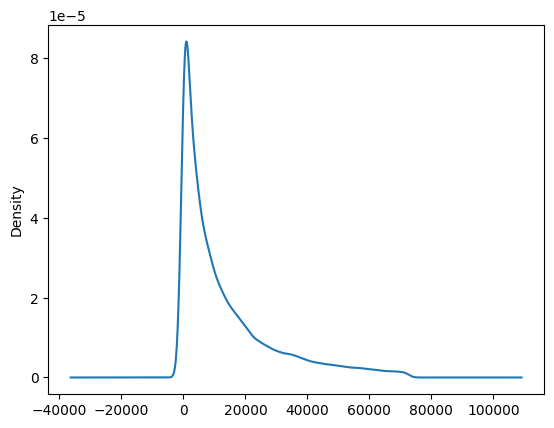

In [11]:
# Create the histogram
fig6 = px.histogram(df2, x='Weekly_Sales', nbins=30, marginal="box", title="Distribution of Weekly Sales")

kde_trace = go.Scatter(
    x=df2['Weekly_Sales'].sort_values(),
    y=df2['Weekly_Sales'].plot.kde().get_lines()[0].get_data()[1],  # Extract KDE curve from pandas
    mode='lines',
    name='KDE',
    line=dict(color='orange')
)

fig6.add_trace(kde_trace)

fig6.update_layout(
    xaxis_title='Weekly Sales',
    yaxis_title='Frequency',
    template='plotly_white'
)

plot(fig6, filename="histogram.html", auto_open=False)

IFrame("histogram.html", width=800, height=600)


1. **Right-Skewed Distribution**: Weekly sales are heavily skewed to the right, with most values concentrated in the lower range and a few higher sales creating a long tail.

2. **High Variability**: The presence of outliers in the boxplot indicates variability in weekly sales across stores and departments.

3. **Dominance of Low Sales**: The KDE and histogram confirm that the majority of weekly sales fall within the lower ranges, suggesting a small percentage of departments contribute significantly to higher sales.

## Weekly Sales with 4-Week Rolling Mean Analysis

In [12]:
df2['Rolling_Mean'] = df2['Weekly_Sales'].rolling(window=4).mean()

fig7 = go.Figure()

fig7.add_trace(go.Scatter(
    x=df2['Date'],
    y=df2['Weekly_Sales'],
    mode='lines',
    name='Weekly Sales',
    line=dict(color='blue', width=2, dash='dot'),
    opacity=0.5
))

# Add the 4-Week Rolling Mean trace
fig7.add_trace(go.Scatter(
    x=df2['Date'],
    y=df2['Rolling_Mean'],
    mode='lines',
    name='4-Week Rolling Mean',
    line=dict(color='orange', width=4)
))

fig7.update_layout(
    title='Weekly Sales and Rolling Mean',
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white',
)

plot(fig7, filename="wsrm.html", auto_open=False)

IFrame("wsrm.html", width=800, height=600)

1. **Stable Weekly Sales**: The weekly sales (represented by the orange line) fluctuate around the **$60,000–$70,000** range consistently, with minimal long-term deviation.

2. **Rolling Mean Smooths the Trend**: The rolling mean (represented by the blue dotted line) helps smooth out short-term fluctuations, showing a stable upward trend in sales over time.

3. **Sales Fluctuations**: The individual weekly sales exhibit periodic fluctuations, likely linked to seasonality or external factors like holidays, as seen by the peaks and dips throughout the year.

## Total Weekly Sales by Month

In [13]:
# Group by month and calculate total weekly sales
monthly_sales = df2.groupby('Month')['Weekly_Sales'].sum().reset_index()

fig8 = px.bar(
    monthly_sales,
    x='Month',
    y='Weekly_Sales',
    title='Monthly Total Weekly Sales',
    labels={'Month': 'Month', 'Weekly_Sales': 'Total Weekly Sales'},
    color='Weekly_Sales',
    color_continuous_scale='Viridis'
)

fig8.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Weekly Sales',
    template='plotly_white'
)

plot(fig8, filename="totalws.html", auto_open=False)

IFrame("totalws.html", width=800, height=600)

1. **Peak Sales in Summer**: The highest total weekly sales occur in **May to August**, exceeding **$450M**, likely due to seasonal demand.

2. **Low Sales in Winter**: January and December see the lowest sales, around **$200M–$300M**, indicating a decline during colder months.

3. **Consistent Performance**: Sales from **March to October** remain relatively stable, hovering between **$400M–$450M**, showcasing steady performance outside the extremes.

## Total Weekly Sales by Year

In [14]:
# Group by year and calculate total sales
yearly_sales = df2.groupby('Year')['Weekly_Sales'].sum().reset_index()

fig9 = px.bar(
    yearly_sales,
    x='Year',
    y='Weekly_Sales',
    title='Total Sales by Year',
    labels={'Year': 'Year', 'Weekly_Sales': 'Total Weekly Sales'},
    color='Weekly_Sales',
    color_continuous_scale='Blues'
)
fig9.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Weekly Sales',
    template='plotly_white'
)

plot(fig9, filename="barys.html", auto_open=False)

IFrame("barys.html", width=800, height=600)

1. **Consistent High Sales**: Total sales in **2010 and 2011** remain nearly identical at around **$1.7B**, indicating stable performance across these years.

2. **Drop in 2012**: A noticeable decline in total sales is observed in **2012**, dropping below **$1.6B**, suggesting possible external or operational challenges.

3. **Peak Performance in 2011**: Among the years shown, **2011** achieves the highest sales, slightly surpassing 2010.

## Boxplot of Weekly Sales

In [15]:
# Create the boxplot for Weekly Sales
fig10 = px.box(
    df2, 
    x='Weekly_Sales',
    title='Boxplot of Weekly Sales',
    labels={'Weekly_Sales': 'Weekly Sales'}
)

fig10.update_layout(
    template='plotly_white'
)

plot(fig10, filename="boxws.html", auto_open=False)

IFrame("boxws.html", width=800, height=600)

1. **Median Weekly Sales**: The median weekly sales are around **$10,000**, indicating a typical sales value for most weeks.

2. **Wide Variability**: The interquartile range spans from approximate l*$5,0 * t*$20,0**, showing moderate variability in sales.

3. **Outliers Present**: Significant outliers above **$40,000** highlight occasional high-performing weeks, with values reaching up to **$70,000**.

1. **Median Weekly Sales**: The median weekly sales are around **$10,000**, indicating a typical sales value for most weeks.

2. **Wide Variability**: The interquartile range spans from approximately $5,000 \to\ $20,000, showing moderate variability in sales.

3. **Outliers Present**: Significant outliers above $40,000\ highlight occasional high-performing weeks, with values reaching up to $70,000.

## Sales Distribution by Store Type

In [16]:
# Create the boxplot for Weekly Sales by Store Type
fig11 = px.box(
    df2,
    x='Type', 
    y='Weekly_Sales',
    title='Sales Distribution by Store Type',
    labels={'Type': 'Store Type', 'Weekly_Sales': 'Weekly Sales'}
)

fig11.update_layout(
    template='plotly_white'
)

plot(fig11, filename="boxwsstore.html", auto_open=False)

IFrame("boxwsstore.html", width=800, height=600)

1. **Higher Median for Type A**: Store type A has the highest median weekly sales compared to types B and C, indicating stronger performance overall.

2. **Similar Variability**: All store types exhibit similar variability, with interquartile ranges and outliers extending up to **$70,000**, reflecting comparable sales potential.

3. **Lower Median for Types B and C**: Store types B and C have lower median weekly sales, suggesting they contribute less to overall sales compared to type A.

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374247 entries, 0 to 374246
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            374247 non-null  datetime64[ns]
 1   Store           374247 non-null  int64         
 2   Dept            374247 non-null  int64         
 3   Weekly_Sales    374247 non-null  float64       
 4   Type            374247 non-null  object        
 5   Size            374247 non-null  int64         
 6   Temperature     374247 non-null  float64       
 7   Fuel_Price      374247 non-null  float64       
 8   CPI             374247 non-null  float64       
 9   Unemployment    374247 non-null  float64       
 10  IsHoliday       374247 non-null  int64         
 11  Year            374247 non-null  int64         
 12  Month           374247 non-null  int64         
 13  Week            374247 non-null  int64         
 14  max             374247 non-null  flo

1. **Size**: 374,247 rows and 22 columns.  
2. **Key Metrics**: Includes `Weekly_Sales`, `Type`, `Size`, `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`.  
3. **Time Features**: `Date`, `Year`, `Month`, `Week`, and `IsHoliday`.  
4. **Derived Stats**: `mean`, `median`, `std`, `max`, `min`, and `Rolling_Mean`.  
5. **Completeness**: Fully populated except `Rolling_Mean` (3 missing values).

## Average Monthly Sales

In [18]:
# Group by month and calculate the average sales
monthly_avg_sales = df2.groupby('Month')['Weekly_Sales'].mean().reset_index()

fig12 = px.bar(
    monthly_avg_sales,
    x='Month',
    y='Weekly_Sales',
    title='Average Monthly Sales',
    labels={'Month': 'Month', 'Weekly_Sales': 'Average Weekly Sales'},
    color='Weekly_Sales',
    color_continuous_scale='Blues'
)

fig12.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Weekly Sales',
    template='plotly_white'
)

plot(fig12, filename="gmas.html", auto_open=False)

IFrame("gmas.html", width=800, height=600)

1. **December Peak**: The highest average weekly sales occur in **December**, exceeding **$14,500**.  
2. **Consistent Mid-Year Sales**: From **March to October**, average weekly sales remain steady around **$13,000–$14,000**.  
3. **Lower Early-Year Sales**: Sales in **January and February** are the lowest, averaging around **$12,000**.  

## Average Sales per Department

In [19]:
# Group by department and calculate the average sales
dept_avg_sales = df2.groupby('Dept')['Weekly_Sales'].mean().reset_index()

fig13 = px.bar(
    dept_avg_sales,
    x='Dept',
    y='Weekly_Sales',
    title='Average Sales per Department',
    labels={'Dept': 'Department', 'Weekly_Sales': 'Average Sales'},
    color='Weekly_Sales',
    color_continuous_scale='Viridis'
)

fig13.update_layout(
    xaxis_title='Department',
    yaxis_title='Average Sales',
    template='plotly_white',
    title_font_size=18,
    xaxis_tickangle=-45
)

plot(fig13, filename="gdas.html", auto_open=False)

IFrame("gdas.html", width=800, height=600)

1. **High-Performing Departments**: Departments **40 and 70** have the highest average sales, exceeding **$45,000**, indicating significant contributions to total revenue.  

2. **Moderate Performance**: Several departments (**10–30 and 80**) have average sales ranging from **$15,000–$30,000**.  

3. **Low-Performing Departments**: Most other departments have average sales below **$10,000**, suggesting lower contributions to overall sales.  
  

## Average Sales by Store Type

In [20]:
# Group by store type and calculate the average sales
store_type_avg_sales = df2.groupby('Type')['Weekly_Sales'].mean().reset_index()

# Create the bar plot for average sales by store type
fig14 = px.bar(
    store_type_avg_sales,
    x='Type',
    y='Weekly_Sales',
    title='Average Sales by Store Type',
    labels={'Type': 'Store Type', 'Weekly_Sales': 'Average Sales'},
    color='Weekly_Sales',
    color_continuous_scale='Plasma'
)

# Update layout for better visualization
fig14.update_layout(
    xaxis_title='Store Type',
    yaxis_title='Average Sales',
    template='plotly_white',
    title_font_size=18,
    xaxis_tickangle=-45
)

# Show the plot
plot(fig14, filename="gsas.html", auto_open=False)
# Display the HTML file in the notebook
IFrame("gsas.html", width=800, height=600)

1. **Highest Average Sales**: Store type **A** has the highest average sales, exceeding **$15,000**, indicating its dominance in revenue generation.

2. **Moderate Performance**: Store type **B** has average sales around **$11,000**, showing a mid-level performance.

3. **Lowest Average Sales**: Store type **C** has the lowest average sales, below **$11,000**, suggesting a smaller contribution to overall revenue.

## Average Sales per Store

In [21]:
# Group by store and calculate the average sales
store_avg_sales = df2.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Create the bar plot for average sales per store
fig15 = px.bar(
    store_avg_sales,
    x='Store',
    y='Weekly_Sales',
    title='Average Sales per Store',
    labels={'Store': 'Store', 'Weekly_Sales': 'Average Sales'},
    color='Weekly_Sales',
    color_continuous_scale='Viridis'
)

# Update layout for better visualization
fig15.update_layout(
    xaxis_title='Store',
    yaxis_title='Average Sales',
    template='plotly_white',
    title_font_size=18,
    xaxis_tickangle=-45
)
# Show the plot
plot(fig15, filename="gsas.html", auto_open=False)
# Display the HTML file in the notebook
IFrame("gsas.html", width=800, height=600)

1. **Top-Performing Stores**: A few stores have average sales exceeding **$18,000**, highlighting their dominance in revenue generation.

2. **Moderate Performers**: Most stores have average sales between **$10,000–$15,000**, indicating consistent mid-level performance.

3. **Low-Performing Stores**: A small number of stores have average sales below **$8,000**, suggesting minimal contribution to total revenue.

## Effect of Temperature

In [22]:
# Create the histogram with KDE for Temperature
fig16 = px.histogram(
    df2,
    x='Temperature',
    nbins=30,
    title='Effect of Temperature',
    labels={'Temperature': 'Temperature'},
    marginal='violin',
    color_discrete_sequence=['skyblue']
)

# Update layout for better visualization
fig16.update_layout(
    xaxis_title='Temperature',
    yaxis_title='Density',
    template='plotly_white',
    title_font_size=15
)

plot(fig16, filename="hist.html", auto_open=False)

IFrame("hist.html", width=800, height=600)

1. **Temperature Range**: Most data points fall within the **40–80°F** range, indicating this is the typical temperature band.

2. **Peak Distribution**: The highest density is observed around **60°F**, suggesting this is the most frequent temperature.

3. **Low Extremes**: Very few observations occur at temperatures below **20°F** or above **90°F**, showing limited extreme weather conditions.

## Pie Chart Distribution of Holidays

In [23]:
# Create the pie chart for the distribution of holidays
holiday_counts = df2['IsHoliday'].value_counts().reset_index()
holiday_counts.columns = ['Holiday', 'Count']

fig17 = px.pie(
    holiday_counts,
    names='Holiday',
    values='Count',
    title='Pie Chart Distribution of Holidays',
    color='Holiday',
    color_discrete_map={'0': 'skyblue', '1': 'salmon'},
    labels={'Holiday': 'Holiday Type'}
)
fig17.update_traces(textinfo='percent+label', pull=[0.1, 0.1])
fig17.update_layout(
    template='plotly_white',
    title_font_size=14
)

plot(fig17, filename="pie.html", auto_open=False)

IFrame("pie.html", width=800, height=600)

1. **Non-Holiday Weeks Dominate**: About **93.9%** of the data represents non-holiday weeks, highlighting their majority presence.

2. **Holiday Weeks**: Only **6.1%** of the data corresponds to holiday weeks, showing their rarity in the dataset.

3. **Implication**: Sales trends are predominantly influenced by non-holiday weeks due to their high frequency.

In [24]:
# Extracting Year, Month, and Week from the 'Date' column
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Week'] = df2['Date'].dt.isocalendar().week
df2[['Year', 'Month', 'Week']].head()

,Year,Month,Week
0,2010,2,5
1,2010,2,5
2,2010,2,5
3,2010,2,5
4,2010,2,5


The dataset now includes the **Year**, **Month**, and **Week** derived from the `Date` column for easier time-based analysis.

In [25]:
df2.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown,YearMonth,Rolling_Mean
0,2010-02-05,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0,2010-02,NaN
1,2010-02-05,1,2,50605.27,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,65615.36,35819.83,46102.090420,45561.85,3440.673222,0.0,2010-02,NaN
2,2010-02-05,1,3,13740.12,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,51159.17,6165.73,13150.478042,10366.85,8708.978853,0.0,2010-02,NaN
3,2010-02-05,1,4,39954.04,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,47893.23,32497.43,36964.154476,36579.96,2930.698313,0.0,2010-02,32305.9825
4,2010-02-05,1,5,32229.38,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,85676.09,11570.27,24257.941119,21183.42,11330.286495,0.0,2010-02,34132.2025


In [26]:
data_monthly = pd.crosstab(df2["Year"], df2["Month"], values=df2["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


The `crosstab` with `aggfunc='sum'` is used to create a summarized view of **total weekly sales** aggregated by **Year** and **Month**, enabling a clear comparison of sales trends across time periods in a structured tabular format.

In [27]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,374247,2011-06-18 03:02:53.176538624,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-03-09 00:00:00,2012-10-26 00:00:00,NaN
Store,374247.0,22.299345,1.0,11.0,22.0,33.0,45.0,12.919329
Dept,374247.0,43.421369,1.0,18.0,36.0,72.0,99.0,30.087812
Weekly_Sales,374247.0,13058.690149,0.0,1979.8,7101.31,18252.355,72756.18,15417.19528
Size,374247.0,134650.701571,34875.0,93188.0,128107.0,202307.0,219622.0,60805.893266
Temperature,374247.0,60.241022,14.02,47.13,62.49,74.22,100.14,18.112858
Fuel_Price,374247.0,3.354381,2.472,2.891,3.462,3.738,4.468,0.466553
CPI,374247.0,173.423324,126.064,132.7568,188.797935,213.178695,227.232807,38.918398
Unemployment,374247.0,7.695551,3.879,6.858,7.838,8.512,12.187,1.39053
IsHoliday,374247.0,0.061211,0.0,0.0,0.0,0.0,1.0,0.239717


## Time Series of Weekly Sales

In [28]:
# Create the time series plot for Weekly Sales
fig18 = go.Figure()

fig18.add_trace(go.Scatter(
    x=df2['Date'],
    y=df2['Weekly_Sales'],
    mode='lines',
    name='Weekly Sales',
    line=dict(color='blue')
))

fig18.update_layout(
    title='Time Series of Weekly Sales',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    template='plotly_white',
    title_font_size=18
)

plot(fig18, filename="tsws.html", auto_open=False)

IFrame("tsws.html", width=800, height=600)

1. **Fluctuations in Weekly Sales**: The time series shows significant weekly fluctuations, with sales peaking at around **$70,000** at regular intervals.

2. **Seasonal Patterns**: Notable spikes are observed during certain periods, likely corresponding to seasonal events or holidays.

3. **General Stability**: Despite the fluctuations, the overall sales pattern appears consistent over the given time frame (2010–2012).

## Coefficient of Variation for Original and Log-Transformed Data
1. **Measure of Dispersion**: Coefficient of Variation (CV) quantifies the relative variability of the data, allowing comparison across datasets with different scales.

2. **Log Transformation**: Log transformation helps stabilize variance and reduce skewness, making the CV of the transformed data more reliable for analysis.

In [29]:
# Original Coefficient of Variation
cv_original = np.std(df2['Weekly_Sales']) / np.mean(df2['Weekly_Sales'])

# Log-transformed Coefficient of Variation
log_sales = np.log1p(df2['Weekly_Sales'])
cv_log = np.std(log_sales) / np.mean(log_sales)

print(f"CV of Original Data: {cv_original}")
print(f"CV of Log-Transformed Data: {cv_log}")

CV of Original Data: 1.1806065161916697
CV of Log-Transformed Data: 0.23463832788057087


The Coefficient of Variation (CV) results show:

1. **Original Data CV**: 1.18, indicating high relative variability in the weekly sales data.
2. **Log-Transformed Data CV**: 0.23, showing significantly lower variability after the log transformation, which suggests that the transformation helped stabilize the data.

In [30]:
df2['Date'] = pd.to_datetime(data['Date'])
df2.columns

Index(['Date', 'Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Week', 'max', 'min', 'mean', 'median', 'std', 'Total_MarkDown',
       'YearMonth', 'Rolling_Mean'],
      dtype='object')

## Seasonal Decomposition of Weekly Sales

1. **Setting `Date` as Index**:
   - Converts the `Date` column into the index to enable time-based operations like resampling.

2. **Resampling**:
   - Weekly sales are resampled to a **monthly frequency (`'MS'`)**, calculating the mean to smooth out weekly fluctuations.

3. **Seasonal Decomposition**:
   - Decomposes the resampled time series (`ts`) into three components:
     - **Trend**: Long-term movement in sales over time.
     - **Seasonal**: Repeating patterns (e.g., monthly or yearly variations).
     - **Residual**: Remaining noise or randomness after removing trend and seasonal components.

4. **Key Variables**:
   - `trend`: Long-term sales movement (dropped NaN for clarity).
   - `seasonal`: Periodic patterns (e.g., holiday or seasonal peaks).
   - `residual`: Variability unexplained by trend or seasonality.

### Insight:
- This analysis helps isolate key patterns in sales data, enabling insights into overall growth, recurring patterns, and irregularities.

In [31]:
# Set the Date as the index
df2.set_index('Date', inplace=True)

# Resample to monthly frequency and calculate the mean
ts = df2['Weekly_Sales'].resample('MS').mean()

decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative')

trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
residual = decomposition.resid.dropna()
ws= df2['Weekly_Sales'].resample('MS').mean()

In [32]:
fig20 = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    subplot_titles=['Trend', 'Seasonal', 'Residual','Weekly Sales'],
    vertical_spacing=0.1
)

# Add trace for Trend
fig20.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend', line=dict(color='blue')), row=1, col=1)

# Add trace for Seasonal
fig20.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonal', line=dict(color='green')), row=2, col=1)

# Add trace for Residual
fig20.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual', line=dict(color='red')), row=3, col=1)

# Add trace for Residual
fig20.add_trace(go.Scatter(x=ws.index, y=ws, mode='lines', name='Weekly sales', line=dict(color='brown')), row=4, col=1)


fig20.update_layout(
    title='Seasonal Decomposition of Weekly Sales',
    # xaxis_title='Date',
    yaxis_title='Values',
    template='plotly_white',
    title_font_size=18,
    showlegend=False
)

plot(fig20, filename="sdk.html", auto_open=False)

IFrame("sdk.html", width=800, height=600)

1. **Trend**: There is a noticeable **downward trend** in weekly sales over the given time frame, suggesting a gradual decline in overall sales performance. This could be attributed to changing market dynamics, operational factors, or external influences affecting sales.  

2. **Seasonality**T the data exhibits clear **seasonal patterns**, with periodic peaks and troughs that repeat over time. These recurring fluctuations are likely tied to specific months, holidays, or seasonal demand cycles, such as increased sales during the holiday season or other promotional periods.  

3. **Residual**: No significant trend or seasonality is observed in the residual component. This component captures the **random noise and unexplained variability** in sales after accounting for trend and seasonality. It represents factors that may be temporary or unique to specific weeks.  

4. **Weekly SalTYes, the original weekly sales data combines both the **trend** and **seasonality** components, showing visible fluctuations over time. The spikes and dips align with the identified seasonal patterns, while the overall movement reflects the downward trend in sales performance.
ns.  

In [33]:
# Plot residuals
residuals = decomposition.resid.dropna()  # Drop NaN values for residuals

# Create the plot
fig21 = go.Figure()

fig21.add_trace(go.Scatter(
    x=residuals.index,
    y=residuals,
    mode='lines',
    name='Residuals',
    line=dict(color='red')
))

fig21.update_layout(
    title='Residuals of the Decomposed Time Series',
    xaxis_title='Date',
    yaxis_title='Residuals',
    template='plotly_white',
    title_font_size=16
)
plot(fig21, filename="Residualssd.html", auto_open=False)

IFrame("Residualssd.html", width=800, height=600)

### Residuals Analysis:
1. **No Clear Pattern**: The residuals fluctuate randomly around a baseline, indicating that the trend and seasonality components have been successfully removed from the time series.  

2. **Peaks and Troughs**: Some significant spikes and drops, such as in early 2011 and early 2012, may indicate unusual events or outliers affecting sales during these periods.  

3. **Variance Stability**: The residuals show a relatively consistent range, suggesting that the remaining variability in the data is not dependent on time.  

4. **Interpretation**: These residuals represent the unpredictable part of the sales data, which may be influenced by factors like random market shifts or unforeseen operational challenges.

## Autocorrelation of Residuals

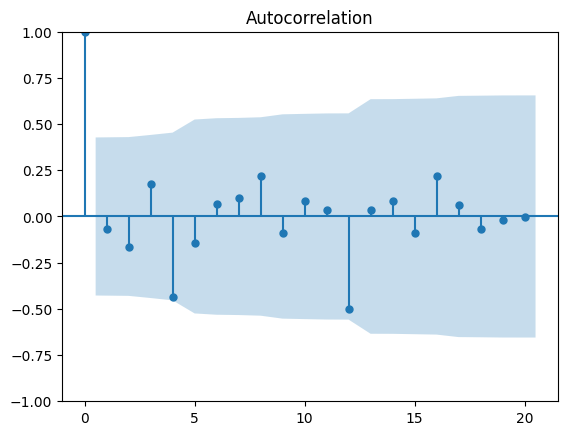

In [34]:
lags = len(residuals) - 1  # Ensure the number of lags does not exceed the residual length
plot_acf(residuals, lags=lags)
plt.show()

### Autocorrelation Analysis:

1. **Lag 0 Autocorrelation**: The autocorrelation at lag 0 is **1**, which is expected since a time series is perfectly correlated with itself at lag 0.  

2. **Significant Lags**: Some lags, especially within the first few (e.g., 1–4), show significant positive or negative autocorrelation values outside the confidence interval (shaded region), indicating the presence of short-term dependencies.  

3. **Diminishing Autocorrelation**: As the lag increases, the autocorrelation values gradually diminish, approaching zero, suggesting limited long-term dependency in the data.  

4. **Randomness Check**: Most lags fall within the confidence interval, supporting the notion that the time series has minimal structured patterns beyond the short-term correlations.  

### Insight:
The autocorrelation function reveals short-term dependencies in the data, but it largely appears random beyond a few lags, indicating the series may be suitable for modeling without significant adjustments.

In [35]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)  # Set 'Date' column as index

In [36]:
data.shape

(374247, 19)

In [37]:
data.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,1,2,50605.27,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,65615.36,35819.83,46102.090420,45561.85,3440.673222,0.0
2010-02-05,1,3,13740.12,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,51159.17,6165.73,13150.478042,10366.85,8708.978853,0.0
2010-02-05,1,4,39954.04,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,47893.23,32497.43,36964.154476,36579.96,2930.698313,0.0
2010-02-05,1,5,32229.38,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,85676.09,11570.27,24257.941119,21183.42,11330.286495,0.0


<div align="center" style="background-color: #FFE3E3; padding: 20px; border-radius: 10px;">
  <h1 style="color: #091057;">Data Preprocessing</h1>

</div>

## One Hot Encoding

In [38]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [39]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,45,93,B
2012-10-26,45,94,B
2012-10-26,45,95,B
2012-10-26,45,97,B
2012-10-26,45,98,B


In [40]:
data.shape

(374247, 19)

In [41]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

 The dataset `data_cat` now contains one-hot encoded columns for `Store`, `Dept`, and `Type`, making it suitable for numerical computations.

In [42]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Dept_9,Dept_10,Dept_11,Dept_12,Dept_13,Dept_14,Dept_16,Dept_17,Dept_18,Dept_19,Dept_20,Dept_21,Dept_22,Dept_23,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_34,Dept_35,Dept_36,Dept_37,Dept_38,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-02-05,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-02-05,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-02-05,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [43]:
data = pd.concat([data, data_cat],axis=1)

In [44]:
data.shape

(374247, 148)

In [45]:
data.drop(columns=cat_col,inplace=True)

In [46]:
data.shape

(374247, 145)

## Data Normalization

In [47]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [48]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Dept_9,Dept_10,Dept_11,Dept_12,Dept_13,Dept_14,Dept_16,Dept_17,Dept_18,Dept_19,Dept_20,Dept_21,Dept_22,Dept_23,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_34,Dept_35,Dept_36,Dept_37,Dept_38,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-02-05,50605.27,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,65615.36,35819.83,46102.090420,45561.85,3440.673222,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-02-05,13740.12,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,51159.17,6165.73,13150.478042,10366.85,8708.978853,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,F

### Minmax Scalar

In [49]:
print(data.columns)

Index(['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Year', 'Month', 'Week',
       ...
       'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98',
       'Dept_99', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object', length=145)


In [50]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))

The `MinMaxScaler` scales features to the range **(0, 1)**, ensuring uniformity and preventing dominance by features with larger magnitudes, which is crucial for machine learning models.  

### Normalization

In [51]:
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [52]:
data = normalization(data.copy(),num_col)

The `normalization` function applies **Min-Max Scaling** to specified numerical columns, transforming values to the range **(0, 1)**, ensuring uniform scaling across features.  

In [53]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Dept_9,Dept_10,Dept_11,Dept_12,Dept_13,Dept_14,Dept_16,Dept_17,Dept_18,Dept_19,Dept_20,Dept_21,Dept_22,Dept_23,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_34,Dept_35,Dept_36,Dept_37,Dept_38,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.8405,0.508787,0,2010,2,5,0.088635,0.253530,0.208157,0.173215,0.138276,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.695546,0.630267,0.328495,0.0501,0.8405,0.508787,0,2010,2,5,0.100982,0.529862,0.425136,0.423845,0.048279,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.188852,0.630267,0.328495,0.0501,0.8405,0.508787,0,2010,2,5,0.078734,0.144833,0.122034,0.097463,0.122204,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,

## **Correlation between features of Dataset**

In [54]:
corr = data[num_col].corr()
fig23 = go.Figure(data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='Viridis',
        colorbar=dict(title='Correlation')
))

fig23.update_layout(
    title='Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features',
    template='plotly_white'
)

plot(fig23, filename="cfd.html", auto_open=False)

IFrame("cfd.html", width=800, height=600)

## **Recursive Feature Elimination**

In [55]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

The Random Forest model was used to calculate **feature importances** to identify and rank the most relevant features for predicting the target variable (`Weekly_Sales`). This helps in selecting the top features for better model performance.

In [56]:
rf_model = RandomForestRegressor(oob_score=True,n_estimators=23)
rf_model.fit(data[feature_col], data['Weekly_Sales'])

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



RandomForestRegressor(n_estimators=23, oob_score=True)

In [57]:
indices = np.argsort(rf_model.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           rf_model.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,4.890038e-01
1,2,median,4.389495e-01
2,3,Week,1.989448e-02
3,4,Temperature,8.834152e-03
4,5,max,6.217056e-03
...,...,...,...
139,140,Dept_51,3.127411e-10
140,141,Dept_45,1.834552e-10
141,142,Dept_78,2.541347e-12
142,143,Dept_39,4.556622e-14


1. **Sorting Feature Importance**:
   - `np.argsort(rf_model.feature_importances_)[::-1]`:
     - Sorts the feature indices in descending order of importance.

2. **Creating an Empty DataFrame**:
   - `feature_rank = pd.DataFrame(columns=['rank', 'feature', 'importance'])`:
     - Initializes a DataFrame to store feature rankings, names, and importance scores.

3. **Populating Feature Rankings**:
   - The loop iterates through all features:
     - Assigns rank (`f+1`).
     - Adds the feature name based on sorted indices.
     - Retrieves the corresponding importance score.

4. **Result**:
   - `feature_rank`: A DataFrame with:
     - `rank`: Feature rank (1 = most important).
     - `feature`: Feature name.
     - `importance`: Feature importance score.

In [58]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'Dept_3', 'IsHoliday', 'Size', 'Dept_9', 'Dept_11', 'Year', 'Dept_1', 'Dept_5', 'Dept_56']


In [59]:
X = data[x]
Y = data['Weekly_Sales']

In [60]:
data = pd.concat([X,Y],axis=1)

In [61]:
data.head()

,mean,median,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,Month,Total_MarkDown,Dept_16,Dept_18,Dept_3,IsHoliday,Size,Dept_9,Dept_11,Year,Dept_1,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.088635,0.8405,0.0501,0.253530,0.508787,0.138276,2,0.0,False,False,False,0,0.630267,False,False,2010,True,False,False,0.342576
2010-02-05,0.425136,0.423845,5,0.328495,0.100982,0.8405,0.0501,0.529862,0.508787,0.048279,2,0.0,False,False,False,0,0.630267,False,False,2010,False,False,False,0.695546
2010-02-05,0.122034,0.097463,5,0.328495,0.078734,0.8405,0.0501,0.144833,0.508787,0.122204,2,0.0,False,False,True,0,0.630267,False,False,2010,False,False,False,0.188852
2010-02-05,0.341081,0.340551,5,0.328495,0.073708,0.8405,0.0501,0.486724,0.508787,0.041123,2,0.0,False,False,False,0,0.630267,False,False,2010,False,False,False,0.549150
2010-02-05,0.224205,0.197771,5,0.328495,0.131856,0.8405,0.0501,0.215005,0.508787,0.158986,2,0.0,False,False,False,0,0.630267,False,False,2010,False,True,False,0.442978


## Data Splitted into Training, Validation, Test

In [62]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

<div align="center" style="background-color: #FFD7C4; padding: 20px; border-radius: 10px;">
  <h1 style="color: #001F3F;">Model</h1>

</div>

## Linear Regression

Linear Regression is used here to model the relationship between the features and the target variable (`Weekly_Sales`) by finding the best-fit linear equation; it is ideal for understanding the influence of multiple predictors and providing baseline performance for regression tasks.  

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
lr.fit(X_train, y_train)
lr_acc = lr.score(X_test, y_test) * 100
print("Linear Regressor Accuracy - ", lr_acc)

Linear Regressor Accuracy -  92.5187328445359


In [66]:
y_pred = lr.predict(X_test)

In [67]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.02985734538541744
MSE 0.0033618279427259346
RMSE 0.05798127234483506
R2 0.9251873995996286


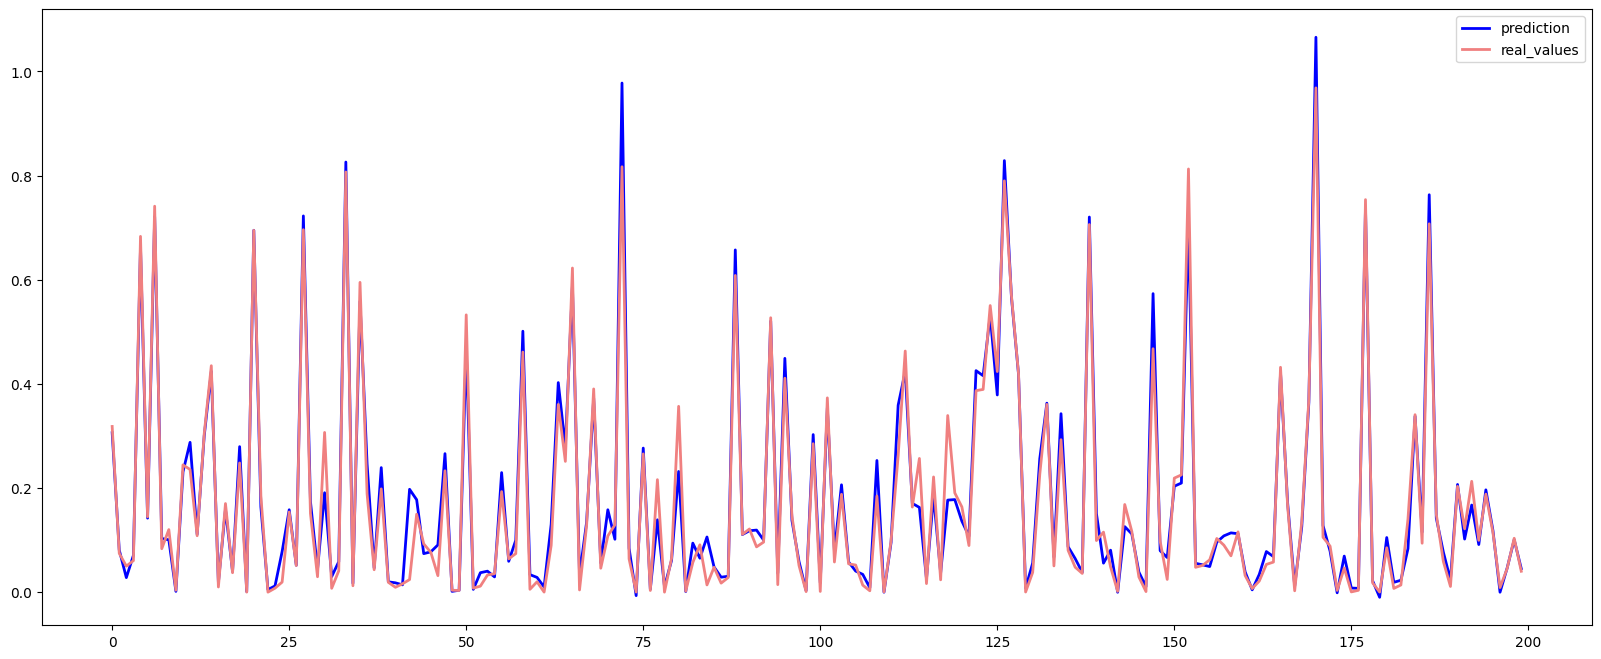

In [68]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

### Observations:

1. Predicted values closely align with real values, indicating good model performance.  
2. Deviations are observed at some peaks, where predictions underestimate or overestimate actual values.  
3. The model captures general trends and fluctuations effectively.  

## Random Forest Regressor

Random Forest Regressor is an ensemble method that handles non-linear relationships, reduces overfitting, and provides feature importance, making it ideal for predicting `Weekly_Sales` and identifying key drivers.  

In [69]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.94136628803325


In [71]:
y_pred = rf.predict(X_test)

In [72]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015446838393841271
MSE 0.0009250802294465205
RMSE 0.03041513158686841
R2 0.979414446944599


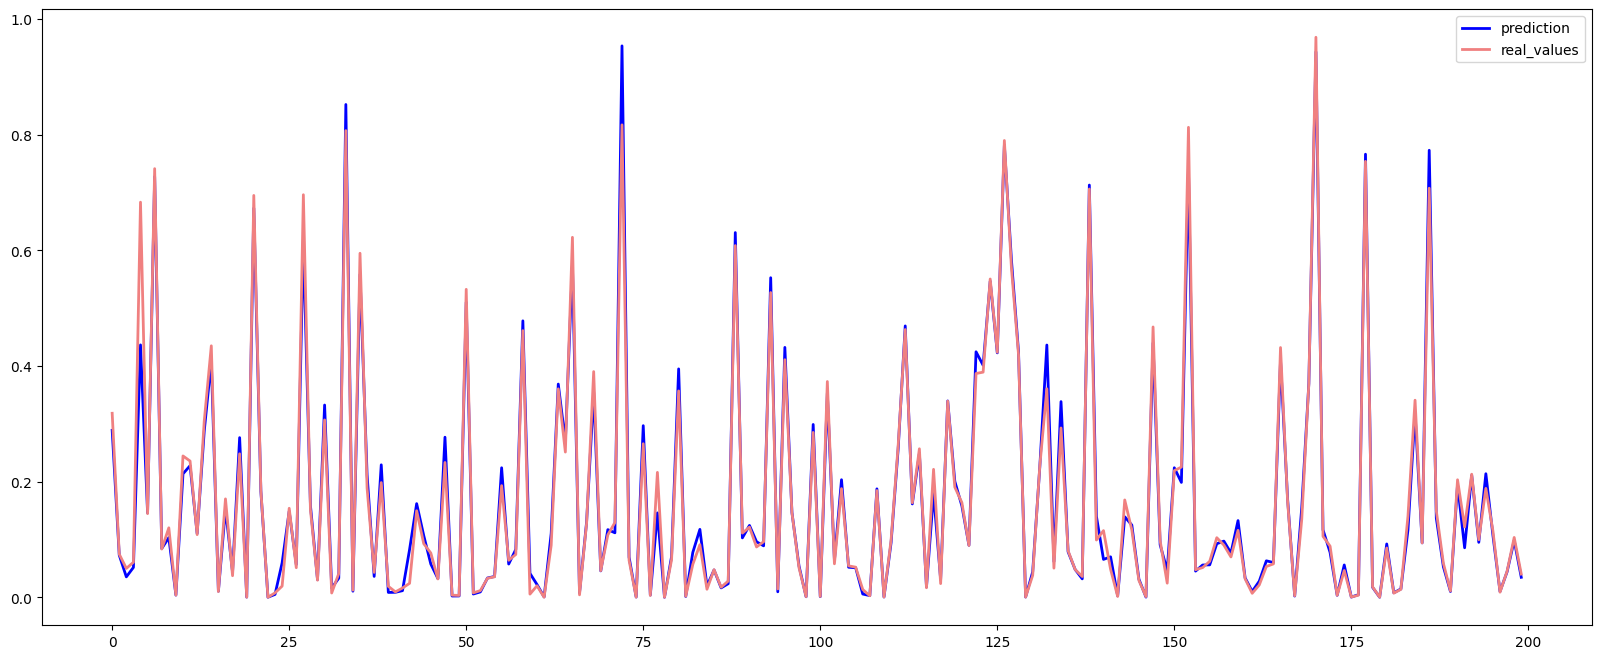

In [73]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

### Observations:

1. **Better Fit**: Predictions in this graph align more closely with actual values, especially in capturing complex fluctuations, compared to the linear regression graph.  
2. **Peak Handling**: This model handles sharp peaks more effectively, though minor deviations still exist, whereas linear regression showed larger underestimations at peaks.  
3. **Non-linear Trends**: The graph suggests better adaptability to non-linear patterns compared to the linear regression model, which is inherently limited to linear relationships.

## K Neighbors Regressor 

K-Neighbors Regressor predicts the target value by averaging the values of the **K nearest neighbors** in the feature space without assuming any specific data relationship.  
It is used here to predict `Weekly_Sales` by leveraging local patterns and similarities among nearby data points for accurate predictions.  
s.  

In [74]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [75]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.9458218064576


In [76]:
y_pred = knn.predict(X_test)

In [77]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03303599522354334
MSE 0.003619274749060208
RMSE 0.060160408484818385
R2 0.9196776001747002


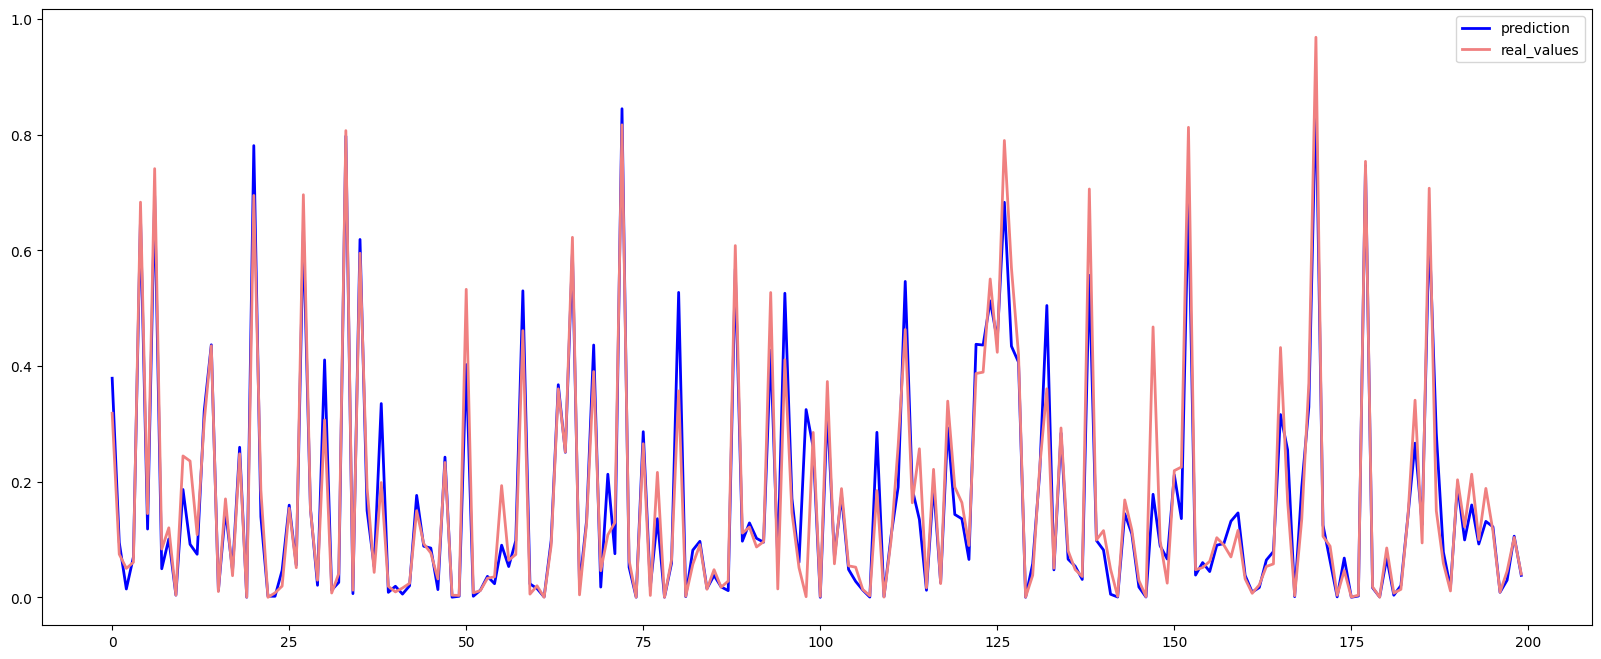

In [78]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


1. Predictions (blue) follow the real values (red) fairly well, capturing local patterns and trends.  
2. Deviations are more noticeable around sharp peaks and valleys, indicating some limitations in capturing extreme variations.  
3. The model effectively identifies general trends but struggles with high-frequency fluctuations.  

## XGboost Regressor

XGBoost (Extreme Gradient Boosting) Regressor is a decision tree-based ensemble learning method that iteratively improves predictions by minimizing errors through gradient boosting.  
It is applied here to predict `Weekly_Sales`, leveraging its ability to model complex patterns, handle non-linear relationships, and deliver high accuracy for sales forecasting.  

In [79]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.34991862183772


In [81]:
y_pred = xgbr.predict(X_test)

In [82]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019749503526159437
MSE 0.0011908567683078495
RMSE 0.034508792623154025
R2 0.9734994845662455


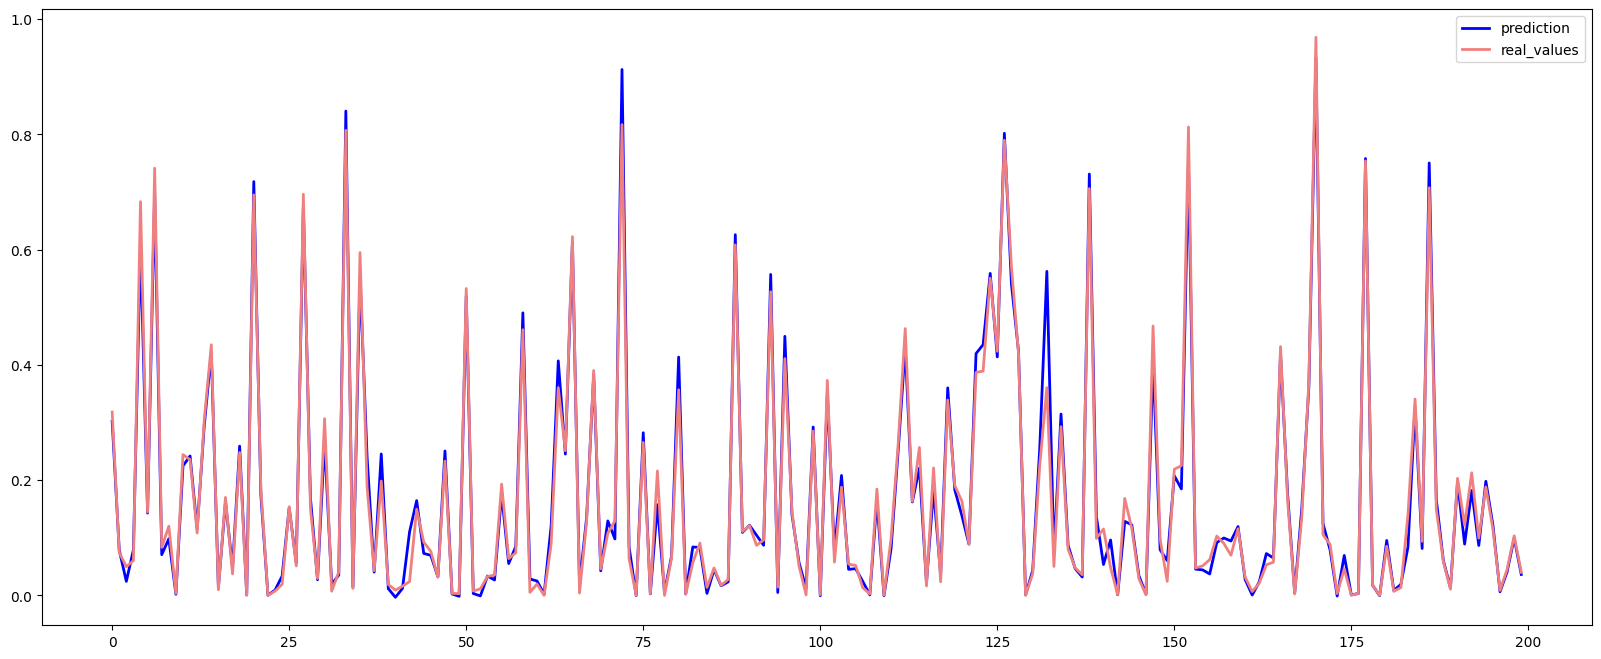

In [83]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


1. Predictions (blue) align closely with real values (red), indicating high model accuracy.  
2. The model effectively captures both sharp peaks and smaller fluctuations, handling non-linear patterns well.  
3. Minimal deviations are observed compared to other models, showcasing XGBoost's robustness in capturing complex relationships.  

## LightGBM 

In [84]:
lgb_train_data = lgb.Dataset(X_train, label=y_train)
lgb_test_data = lgb.Dataset(X_test, label=y_test)

In [85]:
lgb_params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],  # 'l1' for MAE, 'l2' for MSE
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'seed': 50,
    'verbose': -1
}

In [86]:
lgb_model = lgb.train(
    params=lgb_params,
    train_set=lgb_train_data,
    valid_sets=[lgb_train_data, lgb_test_data],  # Validation sets
    num_boost_round=500,
    callbacks=[lgb.early_stopping(stopping_rounds=50)]  # Early stopping as a callback
)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	training's l1: 0.0196894	training's l2: 0.00116201	valid_1's l1: 0.0201031	valid_1's l2: 0.00123832


In [87]:
lgb_y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

In [88]:
lgb_mae = mean_absolute_error(y_test, lgb_y_pred)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)
lgb_r2 = r2_score(y_test, lgb_y_pred)

In [89]:
print(f"MAE: {lgb_mae}")
print(f"MSE: {lgb_mse}")
print(f"RMSE: {lgb_rmse}")
print(f"R²: {lgb_r2}")

MAE: 0.020103106079541
MSE: 0.0012383151192673022
RMSE: 0.0351897018922767
R²: 0.9724430685099927


In [90]:
lgb_acc = r2_score(y_test, lgb_y_pred) * 100
print(f"LightGBM Regressor Accuracy - {lgb_acc:}")

LightGBM Regressor Accuracy - 97.24430685099928


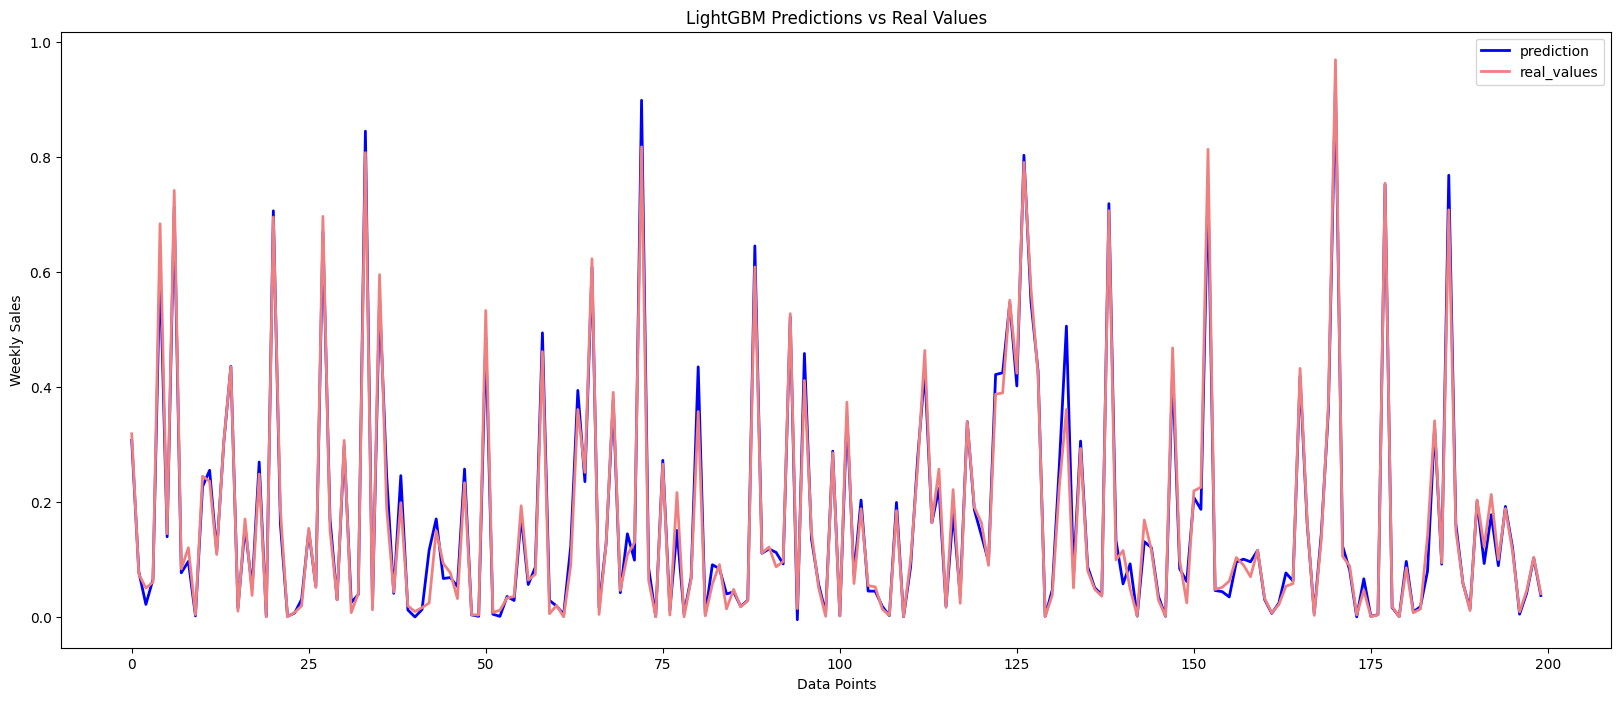

In [91]:
plt.figure(figsize=(20, 8))
plt.plot(lgb_model.predict(X_test[:200], num_iteration=lgb_model.best_iteration), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.title("LightGBM Predictions vs Real Values")
plt.xlabel("Data Points")
plt.ylabel("Weekly Sales")
plt.show()


1. Predictions (blue) closely align with real values (red), indicating high accuracy of the LightGBM model.  
2. The model effectively captures both large peaks and smaller fluctuations, handling complex patterns well.  
3. Minimal deviations are observed, showcasing LightGBM's ability to generalize and adapt to the data's non-linear nature.  

# Comparing Models

In [92]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc', 'lgb_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc, lgb_acc]}

In [93]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.518733
1,rf_acc,97.941366
2,knn_acc,91.945822
3,xgb_acc,97.349919
4,lgb_acc,97.244307


In [94]:
fig25 = px.bar(acc_df, x='model', y='accuracy', 
             title="Model Accuracy Comparison", 
             labels={'model': 'Model', 'accuracy': 'Accuracy'}, 
             text='accuracy')

fig25.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig25.update_layout(
    xaxis_title="Model",
    yaxis_title="Accuracy",
    bargap=0.2  
)
plot(fig25, filename="compacc.html", auto_open=False)
IFrame("compacc.html", width=800, height=600)

### Accuracy Comparison:

1. **Highest Accuracy**: Random Forest achieved the highest accuracy (**97.94%**), outperforming all other models.  

2. **XGBoost and LightGBM**: Both models performed similarly with accuracies of **97.33%** and **97.25%**, respectively, indicating their strength in handling complex patterns.  

3. **Linear Regression**: With an accuracy of **92.52%**, Linear Regression is the least accurate model due to its inability to handle non-linear relationships effectively.  

4. **K-Neighbors Regressor**: KNN achieved an accuracy of **91.89%**, slightly lower than Linear Regression, likely due to its sensitivity to high-dimensional data.  

### Conclusion:
Random Forest is the best-performing model, closely followed by XGBoost and LightGBM, making them ideal choices for predicting `Weekly_Sales`.
edicting `Weekly_Sales`.

<div align="center" style="background-color: #C4E1F6; padding: 20px; border-radius: 10px;">
  <h1 style="color: blue;">Thank You 🙇‍♂️ for Visiting My Notebook!</h1>

  <p style="font-size: 18px; color: black;">
    If you found this content valuable, please consider giving it a upvote <span style="color: blue;">👍</span>.
    <br>Your support is greatly appreciated and motivates me to continue developing more valuable and informative notebooks
  </p>
</div>